In [1]:
print('設定Google網路硬碟，本地端不用這幾行語法')
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

設定Google網路硬碟，本地端不用這幾行語法
Mounted at /content/drive


In [2]:
print('載入資料與基本了解')
import pandas as pd
import numpy as np
TB = pd.read_csv('/content/drive/MyDrive/Colab第三階段202505/ch17_20250724/waimai_10k_tw.csv')
print(TB.head())
print(TB.info)

import re
pattern = re.compile('.{1}')
pattern.findall(TB.review[0])
[pattern.findall(s) for s in TB.review]
mydata = [pattern.findall(s) for s in TB.review]
print(mydata[0:2])

載入資料與基本了解
   label           review
0      1     很快，好吃，味道足，量大
1      1     沒有送水沒有送水沒有送水
2      1         非常快，態度好。
3      1  方便，快捷，味道可口，快遞給力
4      1     菜味道很棒！送餐很及時！
<bound method DataFrame.info of        label                                    review
0          1                              很快，好吃，味道足，量大
1          1                              沒有送水沒有送水沒有送水
2          1                                  非常快，態度好。
3          1                           方便，快捷，味道可口，快遞給力
4          1                              菜味道很棒！送餐很及時！
...      ...                                       ...
11982      0                        以前幾乎天天吃，現在調料什麼都不放，
11983      0  昨天訂涼皮兩份，什麼調料都沒有放，就放了點麻油，特別難吃，丟了一份，再也不想吃了
11984      0                                 涼皮太辣,吃不下都
11985      0                              本來遲到了還自己點！！！
11986      0         肉夾饃不錯，羊肉泡饃醬肉包很一般。涼麵沒想像中好吃。送餐倒是很快。

[11987 rows x 2 columns]>
[['很', '快', '，', '好', '吃', '，', '味', '道', '足', '，', '量', '大'], ['沒', '有', '送', '水', '沒', '有', '送', '水', '沒', '有', '

準備進行序列化動作
得到索引與字詞的對應資料
{'，': 1, '了': 2, '的': 3, '不': 4, '送': 5, '！': 6, '。': 7, '是': 8, '好': 9, '一': 10, ',': 11, '吃': 12, '很': 13, '餐': 14, '沒': 15, '還': 16, '點': 17, '有': 18, '時': 19, '個': 20, '太': 21, '我': 22, '到': 23, '都': 24, '小': 25, '就': 26, '味': 27, '也': 28, '道': 29, '度': 30, '快': 31, '菜': 32, '來': 33, '這': 34, '麼': 35, '肉': 36, '錯': 37, '飯': 38, '次': 39, '多': 40, '慢': 41, '給': 42, '1': 43, '子': 44, '說': 45, '要': 46, '差': 47, '下': 48, '家': 49, '？': 50, '以': 51, '大': 52, '在': 53, '可': 54, '裡': 55, '真': 56, '少': 57, '餅': 58, '速': 59, '外': 60, '過': 61, '人': 62, '訂': 63, '…': 64, '話': 65, '後': 66, '0': 67, '兩': 68, '分': 69, '單': 70, '能': 71, '才': 72, '等': 73, '電': 74, '賣': 75, '半': 76, '涼': 77, '2': 78, '上': 79, '打': 80, '員': 81, '難': 82, '服': 83, '量': 84, '再': 85, '別': 86, '常': 87, '面': 88, '般': 89, '間': 90, '天': 91, '辣': 92, '.': 93, '非': 94, '雞': 95, '你': 96, '啊': 97, '會': 98, '但': 99, '豆': 100, '什': 101, '超': 102, '特': 103, '態': 104, '評': 105, '包': 106, '全': 107, '店': 108, '卷':

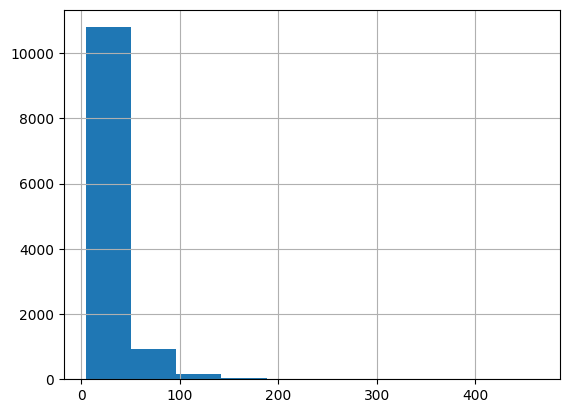

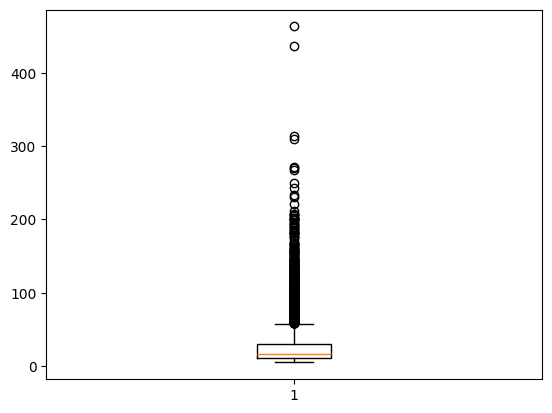

In [3]:
print('準備進行序列化動作')
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(filters = '')
tokenizer.fit_on_texts(mydata)
print('得到索引與字詞的對應資料')
print(tokenizer.word_index)
print('得到字詞與索引的對應資料')
print(tokenizer.index_word)
print('每一串文字轉換為list')
mytxttensor = tokenizer.texts_to_sequences(mydata)
print(mytxttensor[0:2])
print('發現到每一個list長度都會不同')
total = len(mytxttensor)
print('total:', total)
num_max = 0
num_total = 0
num_list = []

for x in range(total):
  if num_max < len(mytxttensor[x]):
    num_max = len(mytxttensor[x])
    if len(mytxttensor[x]) > 30:
      print(mytxttensor[x])
  num_total += len(mytxttensor[x])
  num_list.append(len(mytxttensor[x]))

print('最大字數:', num_max)
print('平均值:', num_total/total)
print('圖表方式呈現')
x1 = np.array(num_list)

import matplotlib.pyplot as plt
plt.hist(x1)
plt.grid()
plt.show()
plt.boxplot(x1)
plt.show()

In [4]:
print('字串的填充與刪除動作')
print('查看原文1:\n', mytxttensor[0:2])
print('查看原文2:\n', mytxttensor[130:131])
mytxttensor1 = pad_sequences(mytxttensor, maxlen = 30, padding='post', truncating='post')
print('查看填充後1-1:\n', mytxttensor1[0:2])
print('查看填充後1-2:\n', mytxttensor1[130:131])
mytxttensor2 = pad_sequences(mytxttensor, maxlen = 30, padding='pre', truncating='pre')
print('查看填充後2-1:\n', mytxttensor2[0:2])
print('查看填充後2-2:\n', mytxttensor2[130:131])

字串的填充與刪除動作
查看原文1:
 [[13, 31, 1, 9, 12, 1, 27, 29, 228, 1, 84, 52], [15, 18, 5, 248, 15, 18, 5, 248, 15, 18, 5, 248]]
查看原文2:
 [[53, 34, 120, 1139, 288, 52, 771, 3, 91, 246, 55, 1, 73, 2, 10, 48, 256, 3, 386, 463, 659, 453, 23, 2, 1, 174, 155, 326, 200, 3, 388, 193, 77, 3, 2, 7, 99, 1665, 129, 157, 281, 244, 3, 1140, 608, 584, 573, 6]]
查看填充後1-1:
 [[ 13  31   1   9  12   1  27  29 228   1  84  52   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [ 15  18   5 248  15  18   5 248  15  18   5 248   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]]
查看填充後1-2:
 [[  53   34  120 1139  288   52  771    3   91  246   55    1   73    2
    10   48  256    3  386  463  659  453   23    2    1  174  155  326
   200    3]]
查看填充後2-1:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   13  31   1   9  12   1  27  29 228   1  84  52]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   15  18   5 248  15  

建立第一個模型:SimpleRNN，最基本樣式


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7103 - loss: 0.5744 - val_accuracy: 0.9166 - val_loss: 0.2429
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8727 - loss: 0.3388 - val_accuracy: 0.8624 - val_loss: 0.3397
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8842 - loss: 0.3101 - val_accuracy: 0.9174 - val_loss: 0.2110
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9057 - loss: 0.2654 - val_accuracy: 0.9575 - val_loss: 0.1321
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9067 - loss: 0.2620 - val_accuracy: 0.9149 - val_loss: 0.2483
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9011 - loss: 0.2780 - val_accuracy: 0.8966 - val_loss: 0.2458
Epoch 7/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9148 - loss: 0.2442 - val_accuracy: 0.9349 - val_loss: 0.1758
Epoch 8/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9181 - 

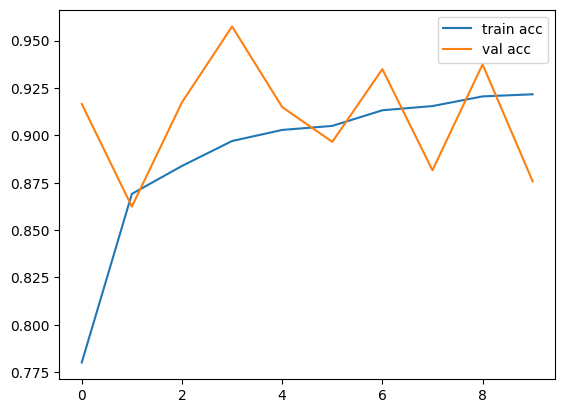

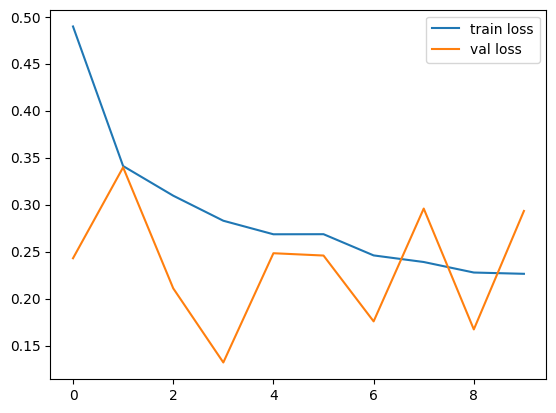

In [5]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第一個模型:SimpleRNN，最基本樣式')
runc = tf.keras.Sequential()
runc.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc.add(layers.SimpleRNN(64))
runc.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc.summary()
print('模型編譯')
runc.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc.fit(mytxttensor1, TB.label, epochs = 10, batch_size = 20, validation_split = 0.1)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第二個模型:SimpleRNN，最基本樣式，執行部分增加


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6706 - loss: 0.5832 - val_accuracy: 0.7946 - val_loss: 0.4625
Epoch 2/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8611 - loss: 0.3557 - val_accuracy: 0.8793 - val_loss: 0.3665
Epoch 3/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8838 - loss: 0.3126 - val_accuracy: 0.8307 - val_loss: 0.4218
Epoch 4/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8983 - loss: 0.2814 - val_accuracy: 0.8579 - val_loss: 0.3677
Epoch 5/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8943 - loss: 0.2935 - val_accuracy: 0.9283 - val_loss: 0.2099
Epoch 6/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9113 - loss: 0.2629 - val_accuracy: 0.8426 - val_loss: 0.4397
Epoch 7/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9101 - loss: 0.2576 - val_accuracy: 0.8368 - val_loss: 0.3865
Epoch 8/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9140 -

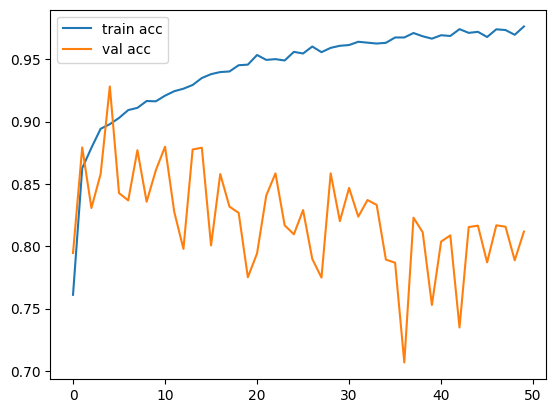

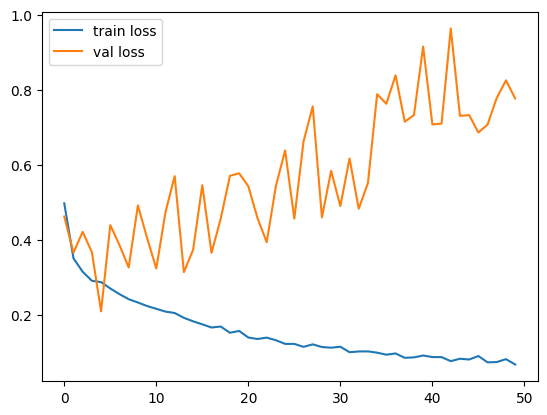

In [6]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第二個模型:SimpleRNN，最基本樣式，執行部分增加')
runc2 = tf.keras.Sequential()
runc2.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc2.add(layers.SimpleRNN(64))
runc2.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc2.summary()
print('模型編譯')
runc2.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc2.fit(mytxttensor1, TB.label, epochs = 50, batch_size = 20, validation_split = 0.3)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第三個模型:SimpleRNN，增加一層layer加上反覆訓練，批次量也增加


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.5916 - loss: 0.6533 - val_accuracy: 0.6405 - val_loss: 0.7205
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.8015 - loss: 0.4439 - val_accuracy: 0.8743 - val_loss: 0.3129
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.8653 - loss: 0.3418 - val_accuracy: 0.8799 - val_loss: 0.3139
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.8827 - loss: 0.3004 - val_accuracy: 0.9183 - val_loss: 0.2341
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.8882 - loss: 0.2906 - val_accuracy: 0.8627 - val_loss: 0.3423
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.9030 - loss: 0.2642 - val_accuracy: 0.8757 - val_loss: 0.3035
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - accuracy: 0.9111 - loss: 0.2442 - val_accuracy: 0.8896 - val_loss: 0.2864
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.9155 - loss: 

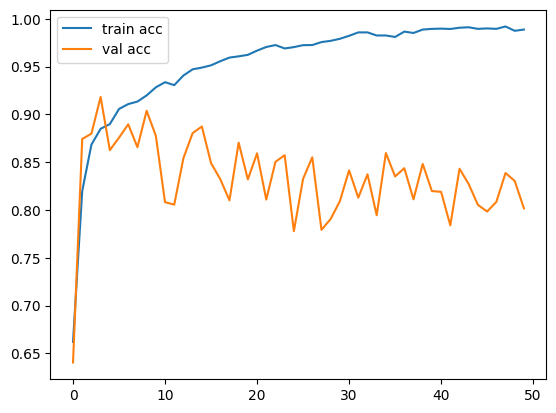

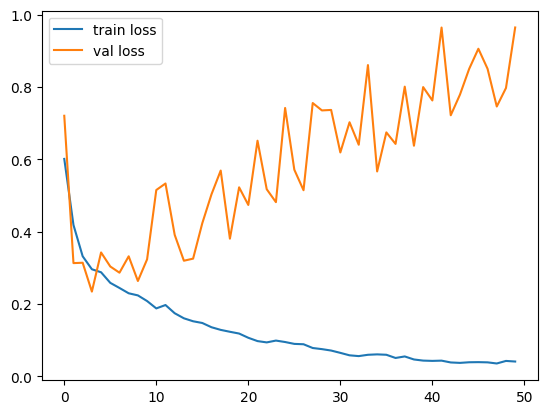

In [7]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第三個模型:SimpleRNN，增加一層layer加上反覆訓練，批次量也增加')
runc3 = tf.keras.Sequential()
runc3.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc3.add(layers.Bidirectional(layers.SimpleRNN(64, return_sequences = True)))
runc3.add(layers.Dropout(0.1))
runc3.add(layers.SimpleRNN(64))
runc3.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc3.summary()
print('模型編譯')
runc3.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc3.fit(mytxttensor1, TB.label, epochs = 50, batch_size = 500, validation_split = 0.3)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第四個模型:SimpleRNN，神經元增加，驗證比例提高


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 349ms/step - accuracy: 0.5893 - loss: 0.6612 - val_accuracy: 0.6634 - val_loss: 0.6169
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 363ms/step - accuracy: 0.7674 - loss: 0.4958 - val_accuracy: 0.7556 - val_loss: 0.5636
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 290ms/step - accuracy: 0.8296 - loss: 0.3965 - val_accuracy: 0.7858 - val_loss: 0.5123
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 307ms/step - accuracy: 0.8734 - loss: 0.3132 - val_accuracy: 0.8517 - val_loss: 0.3759
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 373ms/step - accuracy: 0.8865 - loss: 0.2954 - val_accuracy: 0.8757 - val_loss: 0.3319
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 321ms/step - accuracy: 0.8842 - loss: 0.2917 - val_accuracy: 0.7860 - val_loss: 0.5850
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 265ms/step - accuracy: 0.8942 - loss: 0.2781 - val_accuracy: 0.7987 - val_loss: 0.4849
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 430ms/step - accuracy: 0.9087 - loss:

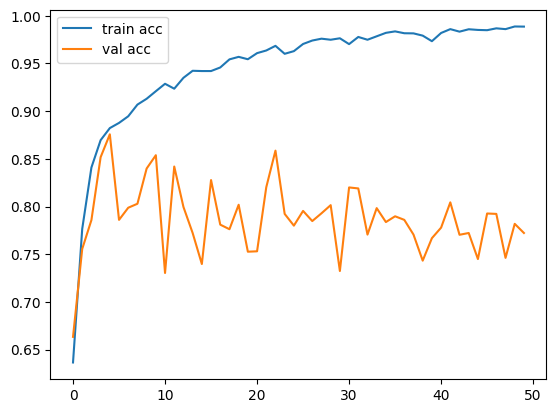

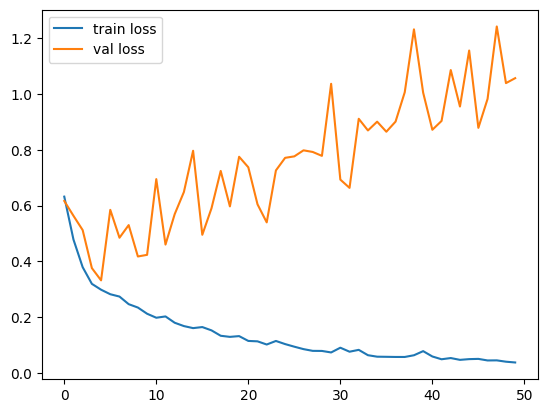

In [8]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第四個模型:SimpleRNN，神經元增加，驗證比例提高')
runc4 = tf.keras.Sequential()
runc4.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc4.add(layers.Bidirectional(layers.SimpleRNN(128, return_sequences = True)))
runc4.add(layers.Dropout(0.1))
runc4.add(layers.SimpleRNN(64))
runc4.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc4.summary()
print('模型編譯')
runc4.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc4.fit(mytxttensor1, TB.label, epochs = 50, batch_size = 500, validation_split = 0.4)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第5個模型:LSTM，最基本樣式


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.7427 - loss: 0.5083 - val_accuracy: 0.9308 - val_loss: 0.2197
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8868 - loss: 0.2989 - val_accuracy: 0.9174 - val_loss: 0.2317
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8906 - loss: 0.2902 - val_accuracy: 0.9208 - val_loss: 0.2612
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9018 - loss: 0.2729 - val_accuracy: 0.9016 - val_loss: 0.2552
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9044 - loss: 0.2622 - val_accuracy: 0.9183 - val_loss: 0.2535
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9086 - loss: 0.2542 - val_accuracy: 0.9058 - val_loss: 0.2617
Epoch 7/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9118 - loss: 0.2469 - val_accuracy: 0.8874 - val_loss: 0.2848
Epoch 8/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0

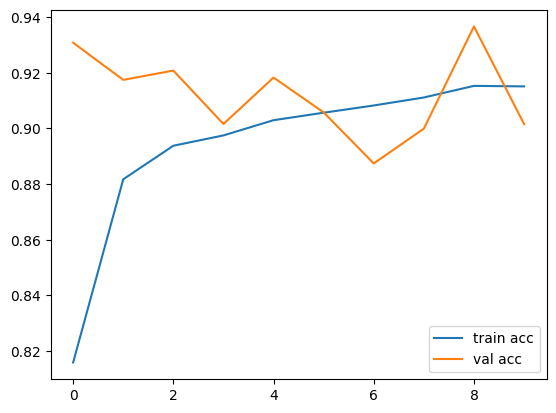

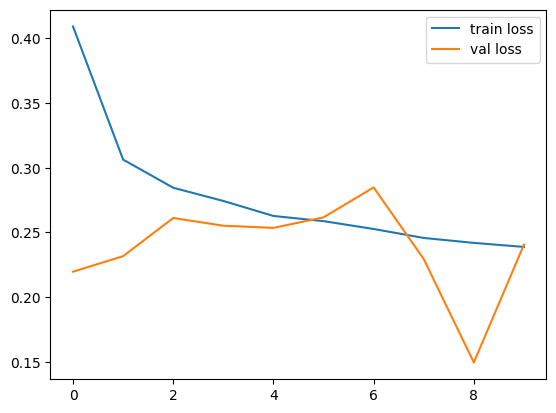

In [9]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第5個模型:LSTM，最基本樣式')
runc5 = tf.keras.Sequential()
runc5.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc5.add(layers.LSTM(64))
runc5.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc5.summary()
print('模型編譯')
runc5.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc5.fit(mytxttensor1, TB.label, epochs = 10, batch_size = 20, validation_split = 0.1)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第6個模型:LSTM，最基本樣式，執行部分增加


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7010 - loss: 0.5447 - val_accuracy: 0.9035 - val_loss: 0.3208
Epoch 2/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8709 - loss: 0.3251 - val_accuracy: 0.9113 - val_loss: 0.2601
Epoch 3/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8883 - loss: 0.2888 - val_accuracy: 0.8860 - val_loss: 0.3036
Epoch 4/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8956 - loss: 0.2761 - val_accuracy: 0.8385 - val_loss: 0.4435
Epoch 5/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8985 - loss: 0.2689 - val_accuracy: 0.8671 - val_loss: 0.3070
Epoch 6/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9085 - loss: 0.2491 - val_accuracy: 0.8212 - val_loss: 0.6084
Epoch 7/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9088 - loss: 0.2462 - val_accuracy: 0.8810 - val_loss: 0.2828
Epoch 8/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.907

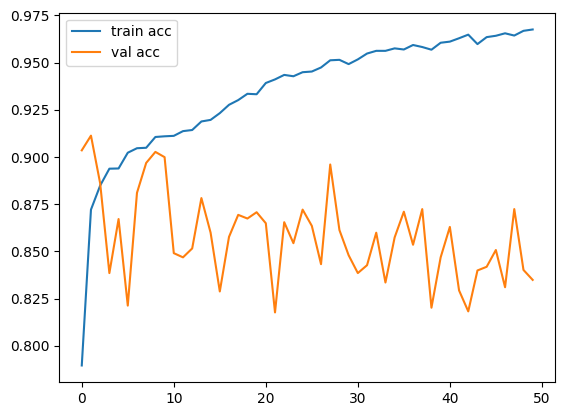

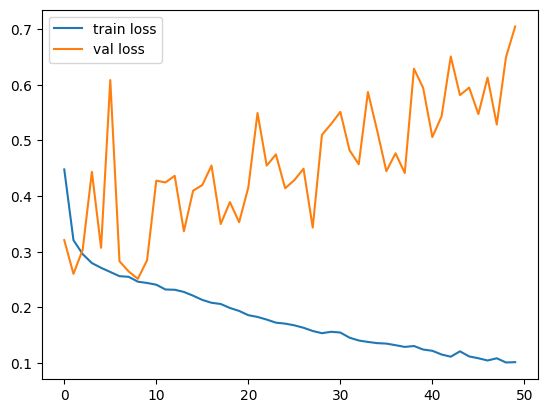

In [10]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第6個模型:LSTM，最基本樣式，執行部分增加')
runc6 = tf.keras.Sequential()
runc6.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc6.add(layers.LSTM(64))
runc6.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc6.summary()
print('模型編譯')
runc6.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc6.fit(mytxttensor1, TB.label, epochs = 50, batch_size = 20, validation_split = 0.3)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第7個模型:LSTM，增加一層layer加上反覆訓練，批次量也增加


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 510ms/step - accuracy: 0.5482 - loss: 0.6799 - val_accuracy: 0.5096 - val_loss: 0.7146
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 380ms/step - accuracy: 0.6946 - loss: 0.5753 - val_accuracy: 0.8368 - val_loss: 0.3251
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 381ms/step - accuracy: 0.8334 - loss: 0.3954 - val_accuracy: 0.8396 - val_loss: 0.3979
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 394ms/step - accuracy: 0.8590 - loss: 0.3375 - val_accuracy: 0.8532 - val_loss: 0.3650
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 579ms/step - accuracy: 0.8778 - loss: 0.2993 - val_accuracy: 0.8821 - val_loss: 0.3115
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - accuracy: 0.8917 - loss: 0.2807 - val_accuracy: 0.9180 - val_loss: 0.2261
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 476ms/step - accuracy: 0.8912 - loss: 0.2815 - val_accuracy: 0.8888 - val_loss: 0.2791
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 416ms/step - accuracy: 0.8956 - l

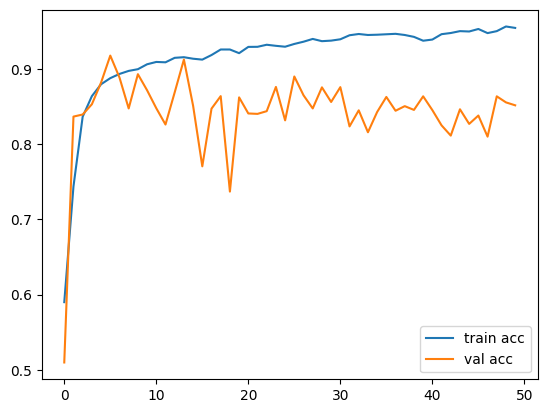

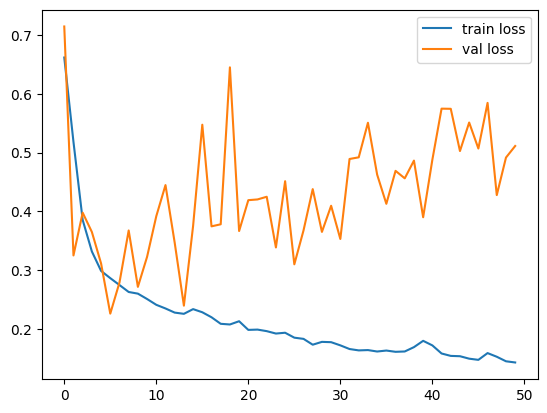

In [11]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第7個模型:LSTM，增加一層layer加上反覆訓練，批次量也增加')
runc7 = tf.keras.Sequential()
runc7.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc7.add(layers.Bidirectional(layers.LSTM(64, return_sequences = True)))
runc7.add(layers.Dropout(0.1))
runc7.add(layers.LSTM(64))
runc7.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc7.summary()
print('模型編譯')
runc7.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc7.fit(mytxttensor1, TB.label, epochs = 50, batch_size = 500, validation_split = 0.3)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第8個模型:LSTM，神經元增加，驗證比例提高


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 923ms/step - accuracy: 0.5318 - loss: 0.6804 - val_accuracy: 0.4717 - val_loss: 0.7493
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 912ms/step - accuracy: 0.6717 - loss: 0.6081 - val_accuracy: 0.6761 - val_loss: 0.6456
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 862ms/step - accuracy: 0.8091 - loss: 0.4373 - val_accuracy: 0.8086 - val_loss: 0.4782
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 916ms/step - accuracy: 0.8428 - loss: 0.3673 - val_accuracy: 0.8805 - val_loss: 0.3537
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 900ms/step - accuracy: 0.8680 - loss: 0.3244 - val_accuracy: 0.7168 - val_loss: 0.6395
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 781ms/step - accuracy: 0.8765 - loss: 0.3115 - val_accuracy: 0.8286 - val_loss: 0.4303
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 923ms/step - accuracy: 0.8847 - loss: 0.2865 - val_accuracy: 0.8786 - val_loss: 0.3380
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 961ms/step - accuracy: 0.8937 

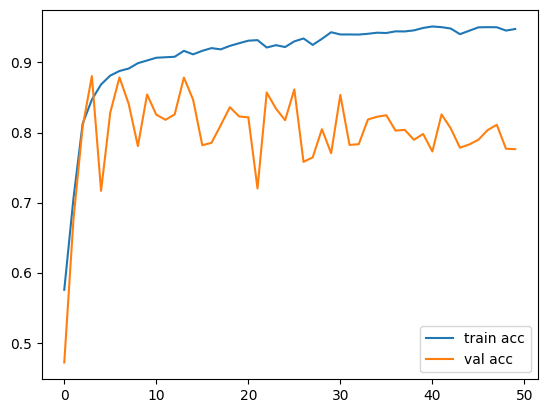

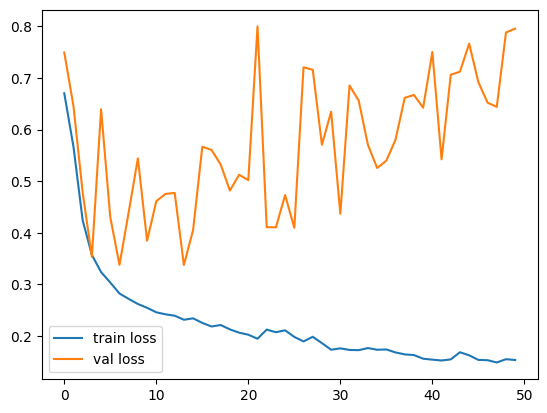

In [12]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第8個模型:LSTM，神經元增加，驗證比例提高')
runc8 = tf.keras.Sequential()
runc8.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc8.add(layers.Bidirectional(layers.LSTM(128, return_sequences = True)))
runc8.add(layers.Dropout(0.1))
runc8.add(layers.LSTM(64))
runc8.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc8.summary()
print('模型編譯')
runc8.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc8.fit(mytxttensor1, TB.label, epochs = 50, batch_size = 500, validation_split = 0.4)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第9個模型:GRU，最基本樣式


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.6781 - loss: 0.5874 - val_accuracy: 0.8857 - val_loss: 0.3172
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8862 - loss: 0.2953 - val_accuracy: 0.8816 - val_loss: 0.2649
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8964 - loss: 0.2697 - val_accuracy: 0.9174 - val_loss: 0.2037
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8974 - loss: 0.2680 - val_accuracy: 0.9299 - val_loss: 0.1819
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9061 - loss: 0.2554 - val_accuracy: 0.9158 - val_loss: 0.2188
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9091 - loss: 0.2449 - val_accuracy: 0.8974 - val_loss: 0.2686
Epoch 7/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9118 - loss: 0.2417 - val_accuracy: 0.9508 - val_loss: 0.1456
Epoch 8/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy:

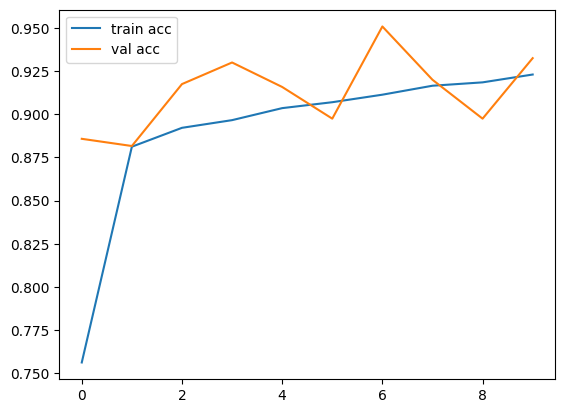

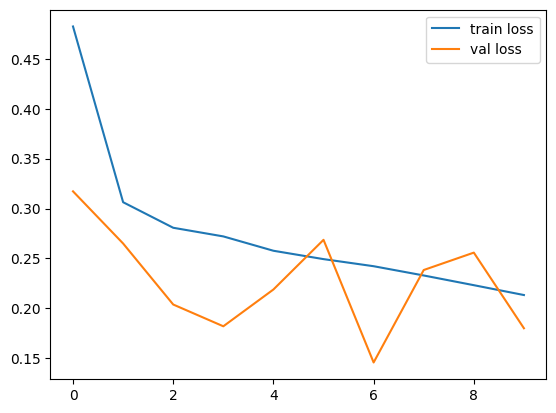

In [13]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第9個模型:GRU，最基本樣式')
runc9 = tf.keras.Sequential()
runc9.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc9.add(layers.GRU(64))
runc9.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc9.summary()
print('模型編譯')
runc9.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc9.fit(mytxttensor1, TB.label, epochs = 10, batch_size = 20, validation_split = 0.1)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第10個模型:GRU，最基本樣式，執行部分增加


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.6447 - loss: 0.6099 - val_accuracy: 0.8688 - val_loss: 0.3343
Epoch 2/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8662 - loss: 0.3315 - val_accuracy: 0.9224 - val_loss: 0.2408
Epoch 3/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8819 - loss: 0.2955 - val_accuracy: 0.7353 - val_loss: 0.7686
Epoch 4/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8935 - loss: 0.2837 - val_accuracy: 0.9422 - val_loss: 0.1697
Epoch 5/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9080 - loss: 0.2532 - val_accuracy: 0.8746 - val_loss: 0.3097
Epoch 6/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9054 - loss: 0.2561 - val_accuracy: 0.8710 - val_loss: 0.3281
Epoch 7/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9084 - loss: 0.2432 - val_accuracy: 0.8743 - val_loss: 0.3428
Epoch 8/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 

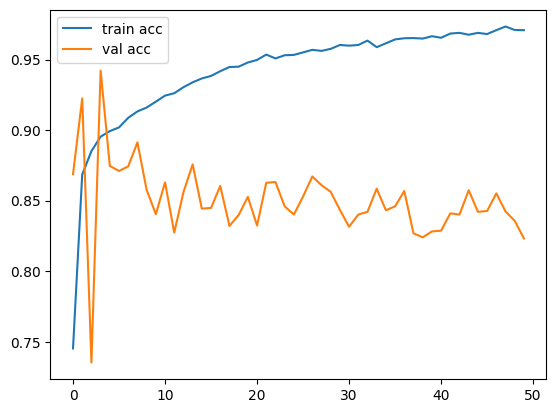

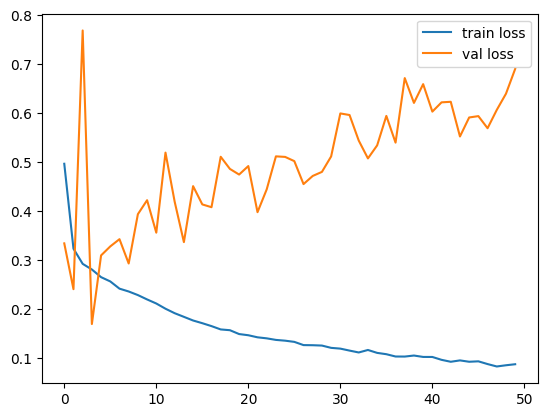

In [14]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第10個模型:GRU，最基本樣式，執行部分增加')
runc10 = tf.keras.Sequential()
runc10.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc10.add(layers.GRU(64))
runc10.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc10.summary()
print('模型編譯')
runc10.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc10.fit(mytxttensor1, TB.label, epochs = 50, batch_size = 20, validation_split = 0.3)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第11個模型:GRU，增加一層layer加上反覆訓練，批次量也增加


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 606ms/step - accuracy: 0.5522 - loss: 0.6850 - val_accuracy: 0.4409 - val_loss: 0.6172
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 451ms/step - accuracy: 0.6278 - loss: 0.6483 - val_accuracy: 0.4151 - val_loss: 0.6715
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 426ms/step - accuracy: 0.6278 - loss: 0.6389 - val_accuracy: 0.5104 - val_loss: 0.5938
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 440ms/step - accuracy: 0.6813 - loss: 0.5836 - val_accuracy: 0.8479 - val_loss: 0.3065
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 555ms/step - accuracy: 0.8245 - loss: 0.4038 - val_accuracy: 0.8312 - val_loss: 0.4292
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 415ms/step - accuracy: 0.8676 - loss: 0.3317 - val_accuracy: 0.8663 - val_loss: 0.3439
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 431ms/step - accuracy: 0.8847 - loss: 0.3021 - val_accuracy: 0.8679 - val_loss: 0.3193
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 406ms/step - accuracy: 0.8902 - 

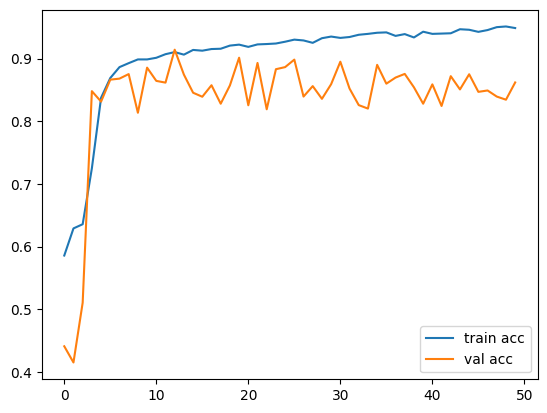

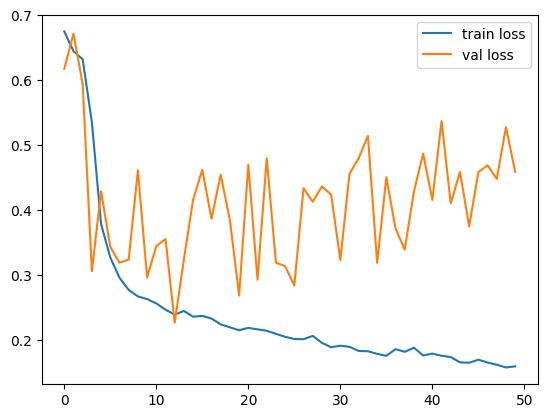

In [15]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第11個模型:GRU，增加一層layer加上反覆訓練，批次量也增加')
runc11 = tf.keras.Sequential()
runc11.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc11.add(layers.Bidirectional(layers.GRU(64, return_sequences = True)))
runc11.add(layers.Dropout(0.1))
runc11.add(layers.GRU(64))
runc11.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc11.summary()
print('模型編譯')
runc11.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc11.fit(mytxttensor1, TB.label, epochs = 50, batch_size = 500, validation_split = 0.3)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第12個模型:GRU，神經元增加，驗證比例提高


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 970ms/step - accuracy: 0.5729 - loss: 0.6814 - val_accuracy: 0.3783 - val_loss: 0.7566
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 869ms/step - accuracy: 0.6566 - loss: 0.6402 - val_accuracy: 0.3940 - val_loss: 0.7013
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 866ms/step - accuracy: 0.6474 - loss: 0.6370 - val_accuracy: 0.4430 - val_loss: 0.7790
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 921ms/step - accuracy: 0.7057 - loss: 0.5636 - val_accuracy: 0.7270 - val_loss: 0.5845
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 920ms/step - accuracy: 0.8261 - loss: 0.4005 - val_accuracy: 0.8818 - val_loss: 0.3117
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 933ms/step - accuracy: 0.8590 - loss: 0.3376 - val_accuracy: 0.8865 - val_loss: 0.2998
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 864ms/step - accuracy: 0.8761 - loss: 0.3002 - val_accuracy: 0.8428 - val_loss: 0.4033
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 903ms/step - accuracy: 0.8922 

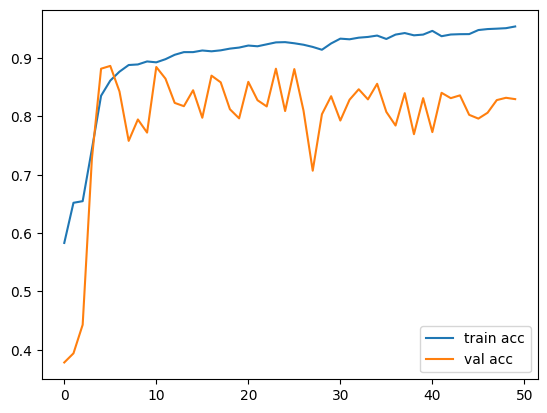

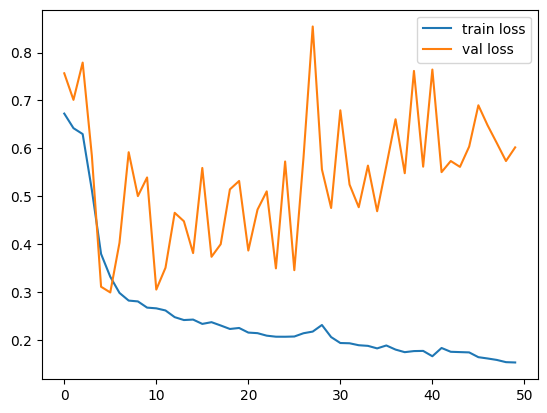

In [16]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第12個模型:GRU，神經元增加，驗證比例提高')
runc12 = tf.keras.Sequential()
runc12.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc12.add(layers.Bidirectional(layers.GRU(128, return_sequences = True)))
runc12.add(layers.Dropout(0.1))
runc12.add(layers.GRU(64))
runc12.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc12.summary()
print('模型編譯')
runc12.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc12.fit(mytxttensor1, TB.label, epochs = 50, batch_size = 500, validation_split = 0.4)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [17]:
print('進行輸入資料後預測，所以輸入的資料也得做轉換')
str1 = input('請輸入一段詞彙')
print('輸入詞彙拆解為一個一個字')
str2 = pattern.findall(str1)
list1 = [str2]
print('每一串文字轉換為list')
mytxttensor4 = tokenizer.texts_to_sequences(list1)
mytxttensor5 = pad_sequences(mytxttensor4, maxlen = 30, padding='post', truncating='post')
print('資料準備好了，要做預測了，0代表負面，1代表正面')
print('SimpleRNN部分')
print(runc.predict(mytxttensor5))
print(runc2.predict(mytxttensor5))
print(runc3.predict(mytxttensor5))
print(runc4.predict(mytxttensor5))
print('LSTM部分')
print(runc5.predict(mytxttensor5))
print(runc6.predict(mytxttensor5))
print(runc7.predict(mytxttensor5))
print(runc8.predict(mytxttensor5))
print('GRU部分')
print(runc9.predict(mytxttensor5))
print(runc10.predict(mytxttensor5))
print(runc11.predict(mytxttensor5))
print(runc12.predict(mytxttensor5))

進行輸入資料後預測，所以輸入的資料也得做轉換
請輸入一段詞彙水果看起來好好吃
輸入詞彙拆解為一個一個字
每一串文字轉換為list
資料準備好了，要做預測了，0代表負面，1代表正面
SimpleRNN部分
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
[[0.5120561]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
[[0.507351]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
[[0.98640245]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
[[0.9984984]]
LSTM部分


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
[[0.9458223]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
[[0.9697829]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
[[0.98859507]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
[[0.99275553]]
GRU部分
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
[[0.95480597]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
[[0.6916826]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
[[0.9806342]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
[[0.9869308]]
